In [1]:
# This is for the dataset:
# QCd_louvain_multi_clustered_harmony_ws_24pcs_FAD_PBMC_20samples_20240321_harmony_by_sample.rdata

# Using the "sccoda" conda environment
# https://sccoda.readthedocs.io/en/latest/getting_started.html
# pip install sccoda
# pip install tensorflow-probability
# pip install tensorflow
# pip install tf-keras

# Setup
import importlib
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import pickle as pkl
import matplotlib.pyplot as plt
import arviz as az
import scanpy as sc

from sccoda.util import comp_ana as mod
from sccoda.util import cell_composition_data as dat
from sccoda.util import data_visualization as viz

import sccoda.datasets as scd
import anndata as ad

2024-05-12 12:17:07.848389: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-12 12:17:08.636488: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-12 12:17:11.242287: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-12 12:17:18.930380: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


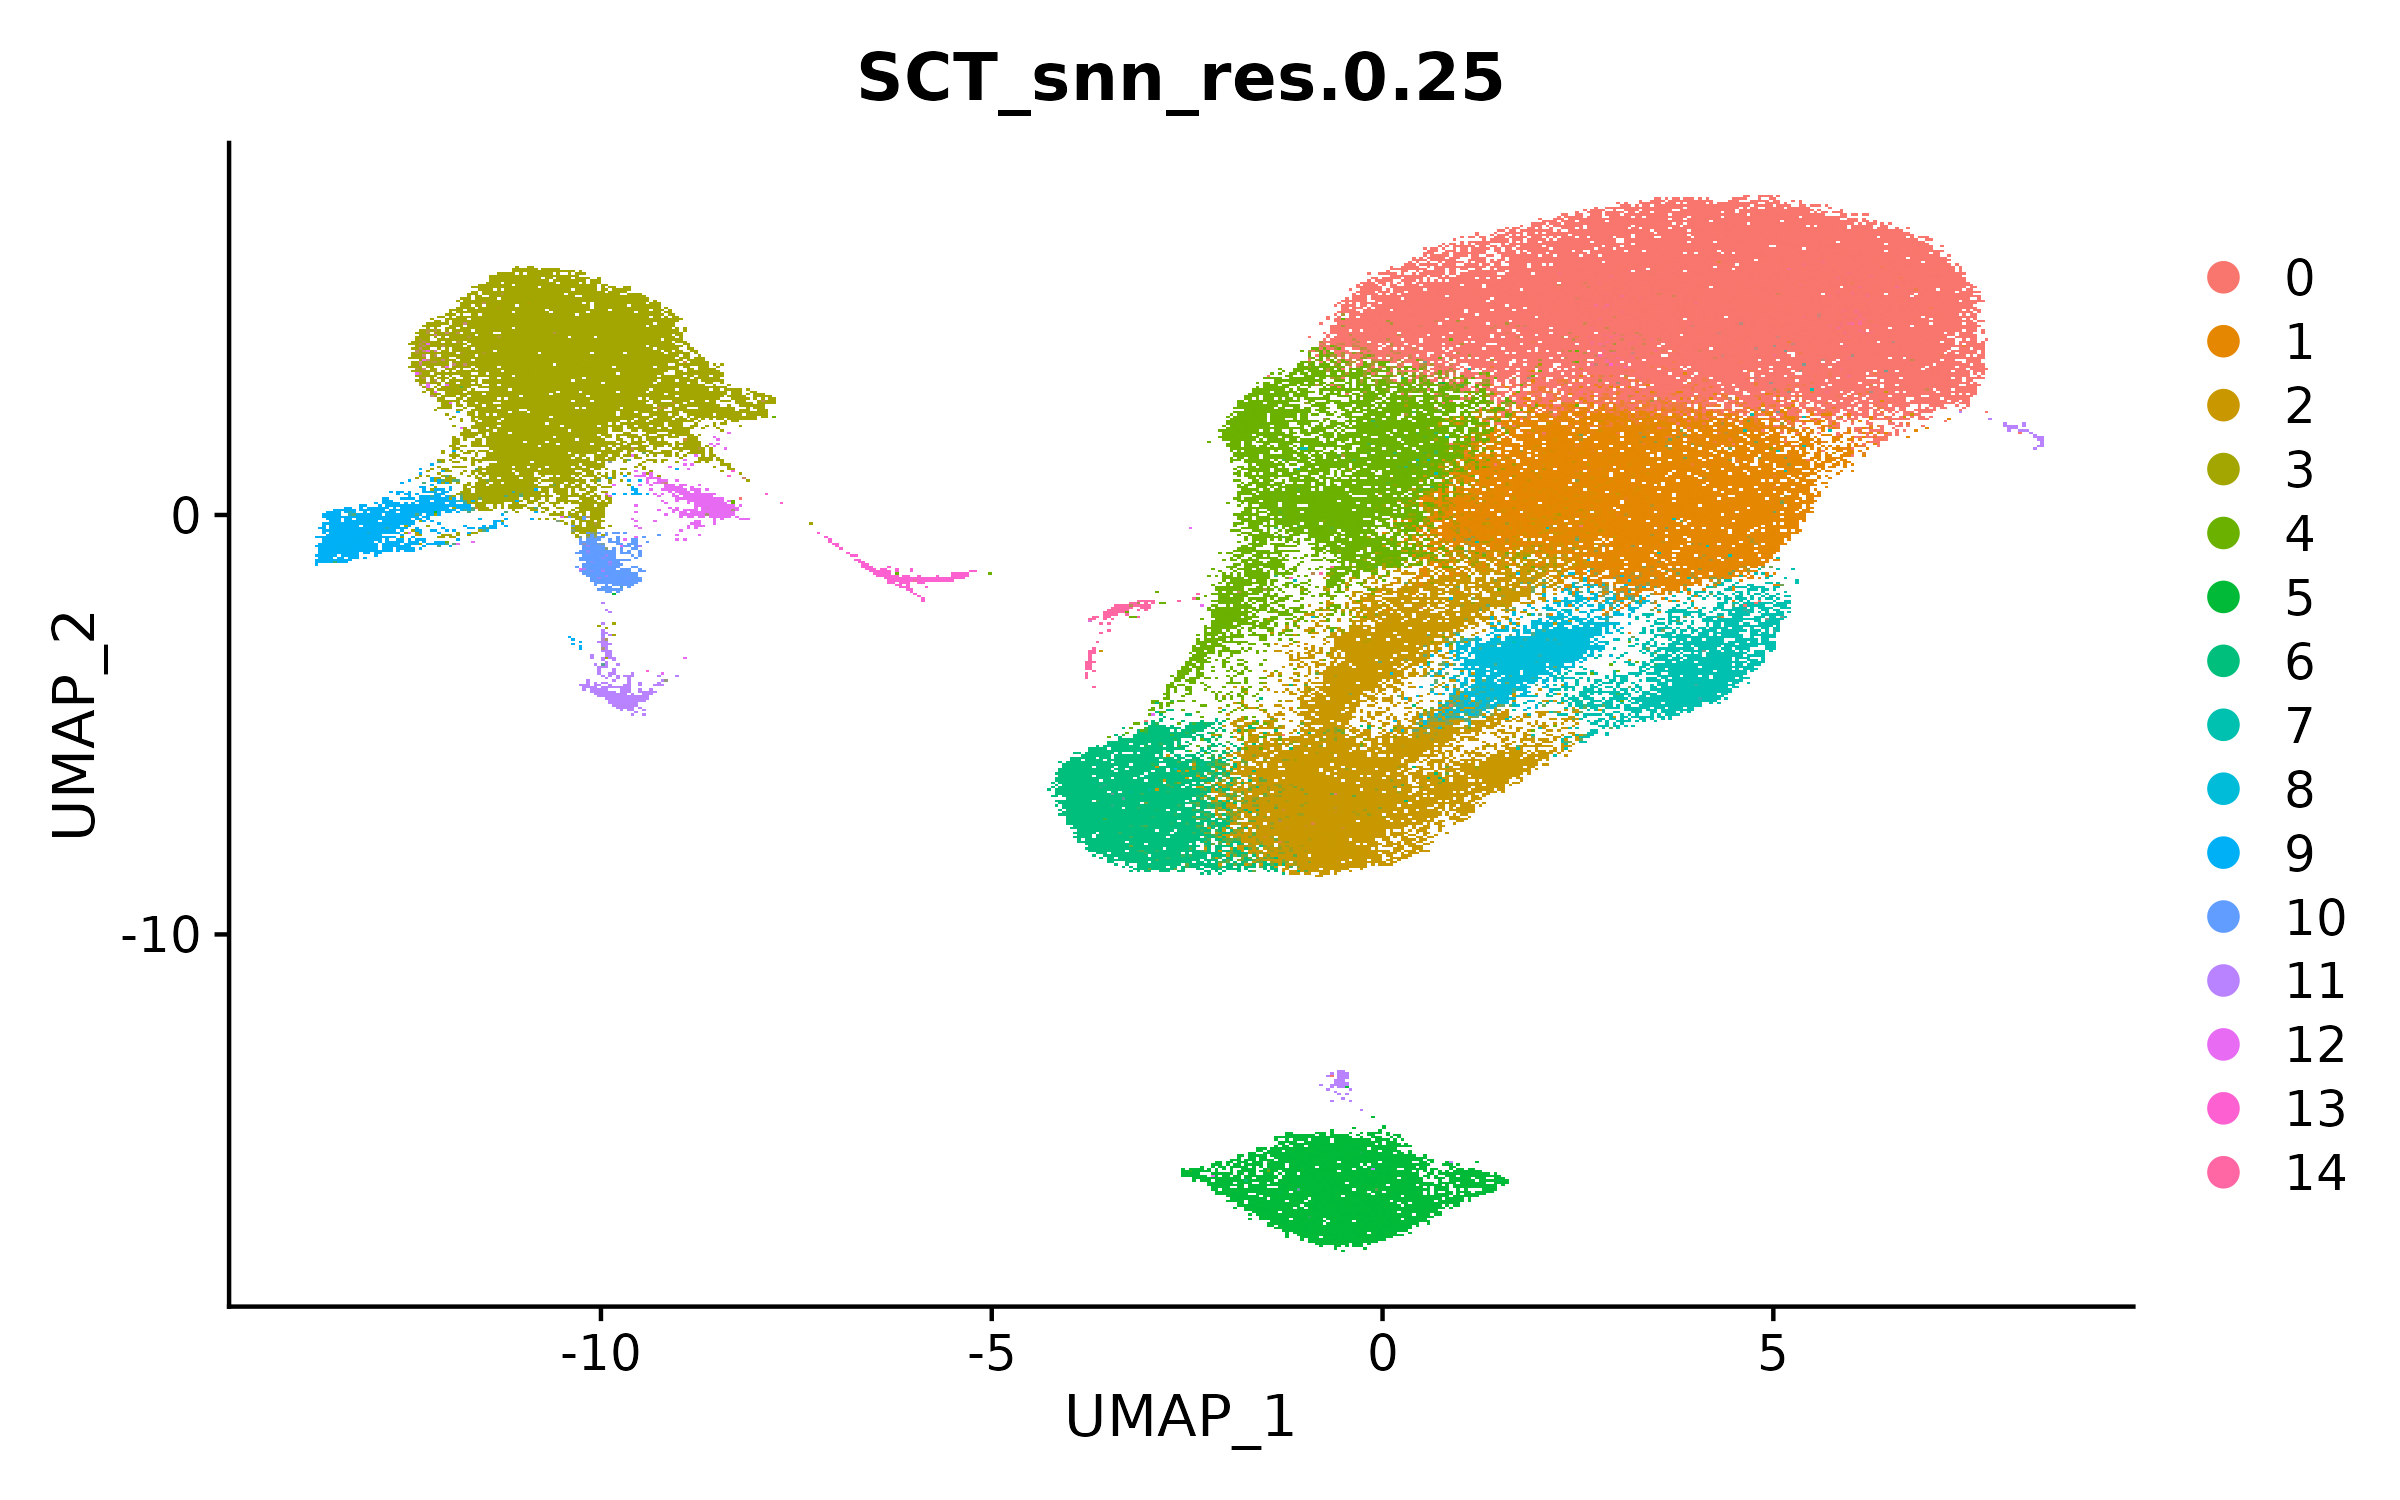

In [2]:
from IPython.display import display, Image
# Path to the image file
image_path = '/home/users/kzlin/kzlinlab/projects/subject-de/git/subject-de_kevin/figures/kevin/Writeup4/24pcs_FAD_PBMC_20samples_20240321_umap.png'

# Display the image
display(Image(filename=image_path))

In [3]:
# Load data

cell_counts = pd.read_csv("/home/users/kzlin/kzlinlab/projects/subject-de/out/kevin/Writeup4/24pcs_FAD_PBMC_20samples_20240321_composition.csv")

print(cell_counts)

   Pt_ID_mutation  cluster_0  cluster_1  cluster_2  cluster_3  cluster_4  \
0        0_cls_09       2718       1215       1434       1016        878   
1        0_cls_43       1718        638       1204       1392        746   
2        0_cls_54       2170       1405       1558        665        576   
3        0_cls_59       3507       1945        916       1266        697   
4        0_cls_62       1861       1046        744       1544        483   
5        0_cls_73       3112        716        560       1159        444   
6        0_cls_77       2487       1041       1407       1065        578   
7        0_cls_78       3530       1493        886       1073        789   
8        0_cls_81        559        266        130         59        287   
9        1_cls_02        335        210        236        380        225   
10       1_cls_03       1574        432        456        816        286   
11       1_cls_06       2462       1204        696       1244        611   
12       1_c

In [4]:
def extract_first_character(df, column_name):
    # Apply a lambda function to slice the first character
    df[column_name] = df[column_name].apply(lambda x: x[0])

# Apply the function to your DataFrame
extract_first_character(cell_counts, 'Pt_ID_mutation')


In [5]:
print(cell_counts)

   Pt_ID_mutation  cluster_0  cluster_1  cluster_2  cluster_3  cluster_4  \
0               0       2718       1215       1434       1016        878   
1               0       1718        638       1204       1392        746   
2               0       2170       1405       1558        665        576   
3               0       3507       1945        916       1266        697   
4               0       1861       1046        744       1544        483   
5               0       3112        716        560       1159        444   
6               0       2487       1041       1407       1065        578   
7               0       3530       1493        886       1073        789   
8               0        559        266        130         59        287   
9               1        335        210        236        380        225   
10              1       1574        432        456        816        286   
11              1       2462       1204        696       1244        611   
12          

In [6]:
# Convert data to anndata object
data_all = dat.from_pandas(cell_counts, covariate_columns=["Pt_ID_mutation"])

print(data_all)

AnnData object with n_obs × n_vars = 20 × 15
    obs: 'Pt_ID_mutation'


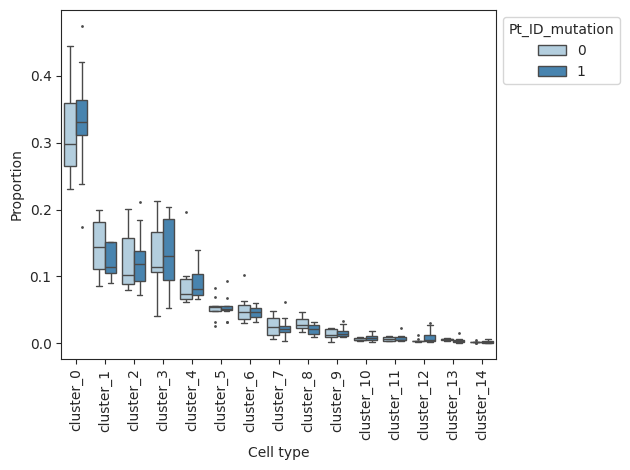

In [7]:
viz.boxplots(data_all, feature_name="Pt_ID_mutation")
plt.show()

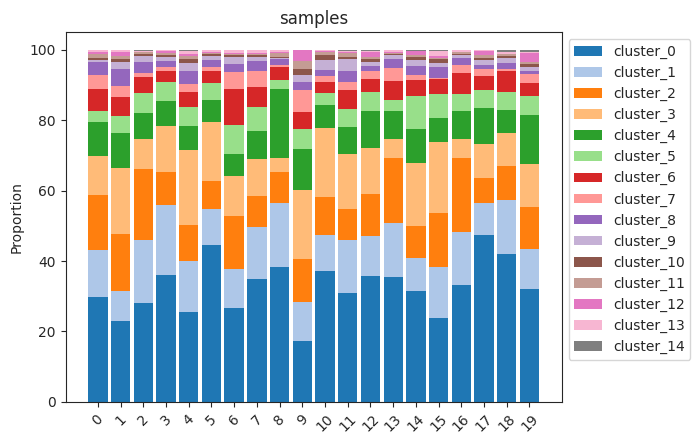

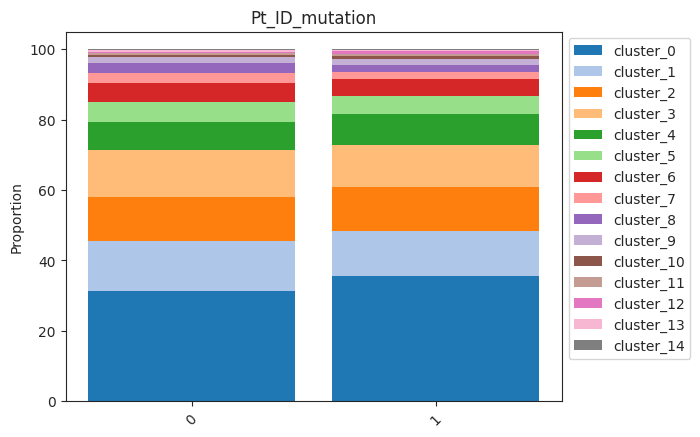

In [8]:
# Stacked barplot for each sample
viz.stacked_barplot(data_all, feature_name="samples")
plt.show()

# Stacked barplot for the levels of "Condition"
viz.stacked_barplot(data_all, feature_name="Pt_ID_mutation")
plt.show()

In [9]:
# Set 0 as "default" category

model_all = mod.CompositionalAnalysis(data_all, formula="C(Pt_ID_mutation, Treatment('1'))", reference_cell_type="cluster_0")
all_results = model_all.sample_hmc()
all_results.summary()

I0000 00:00:1715541456.823880  485925 service.cc:145] XLA service 0x7f1c30007500 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1715541456.823983  485925 service.cc:153]   StreamExecutor device (0): Host, Default Version
  0%|          | 0/20000 [00:00<?, ?it/s]2024-05-12 12:17:37.088713: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1715541458.529757  485925 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
100%|██████████| 20000/20000 [04:41<00:00, 71.09it/s]


MCMC sampling finished. (355.354 sec)
Acceptance rate: 46.6%
Compositional Analysis summary:

Data: 20 samples, 15 cell types
Reference index: 0
Formula: C(Pt_ID_mutation, Treatment('1'))

Intercepts:
            Final Parameter  Expected Sample
Cell Type                                   
cluster_0             3.670      2142.561116
cluster_1             2.772       872.844288
cluster_2             2.697       809.775603
cluster_3             2.713       822.836219
cluster_4             2.396       599.296925
cluster_5             1.891       361.679035
cluster_6             1.808       332.871715
cluster_7             1.039       154.278155
cluster_8             1.135       169.823078
cluster_9             0.747       115.210072
cluster_10            0.191        66.072801
cluster_11            0.142        62.913274
cluster_12            0.003        54.748894
cluster_13           -0.098        49.489334
cluster_14           -0.612        29.599491


Effects:
                       

Let's try to add the covariates...

In [10]:
# Load data

donor_metadata = pd.read_csv("/home/users/kzlin/kzlinlab/projects/subject-de/out/kevin/Writeup4/24pcs_FAD_PBMC_20samples_20240321_donor-metadata.csv")

print(donor_metadata)

   Pt_ID_mutation     sex  AGE  apoe_4_dose
0        0_cls_09    male   28            0
1        0_cls_43    male   36            0
2        0_cls_54    male   59            0
3        0_cls_59  female   45            0
4        0_cls_62  female   20            2
5        0_cls_73    male   34            1
6        0_cls_77    male   36            0
7        0_cls_78  female   29            0
8        0_cls_81  female   31            0
9        1_cls_02    male   27            1
10       1_cls_03  female   36            1
11       1_cls_06    male   37            1
12       1_cls_11    male   46            0
13       1_cls_28  female   30            0
14       1_cls_39    male   69            0
15       1_cls_60  female   33            1
16       1_cls_63  female   37            0
17       1_cls_71  female   33            0
18       1_cls_79  female   28            0
19       1_cls_96    male   37            1


In [11]:
# Load data

cell_counts = pd.read_csv("/home/users/kzlin/kzlinlab/projects/subject-de/out/kevin/Writeup4/24pcs_FAD_PBMC_20samples_20240321_composition.csv")

print(cell_counts)

   Pt_ID_mutation  cluster_0  cluster_1  cluster_2  cluster_3  cluster_4  \
0        0_cls_09       2718       1215       1434       1016        878   
1        0_cls_43       1718        638       1204       1392        746   
2        0_cls_54       2170       1405       1558        665        576   
3        0_cls_59       3507       1945        916       1266        697   
4        0_cls_62       1861       1046        744       1544        483   
5        0_cls_73       3112        716        560       1159        444   
6        0_cls_77       2487       1041       1407       1065        578   
7        0_cls_78       3530       1493        886       1073        789   
8        0_cls_81        559        266        130         59        287   
9        1_cls_02        335        210        236        380        225   
10       1_cls_03       1574        432        456        816        286   
11       1_cls_06       2462       1204        696       1244        611   
12       1_c

In [12]:
result = pd.merge(donor_metadata, cell_counts, left_on='Pt_ID_mutation', right_on='Pt_ID_mutation')
result

,Pt_ID_mutation,sex,AGE,apoe_4_dose,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9,cluster_10,cluster_11,cluster_12,cluster_13,cluster_14
0,0_cls_09,male,28,0,2718,1215,1434,1016,878,285,579,341,335,75,50,85,62,43,13
1,0_cls_43,male,36,0,1718,638,1204,1392,746,358,402,238,351,159,59,57,88,33,12
2,0_cls_54,male,59,0,2170,1405,1558,665,576,432,367,90,233,144,39,35,14,22,18
3,0_cls_59,female,45,0,3507,1945,916,1266,697,531,297,123,161,127,56,54,36,39,3
4,0_cls_62,female,20,2,1861,1046,744,1544,483,400,300,173,278,164,68,76,27,61,31
5,0_cls_73,male,34,1,3112,716,560,1159,444,341,229,80,156,76,36,21,9,48,3
6,0_cls_77,male,36,0,2487,1041,1407,1065,578,767,955,457,210,198,46,26,28,74,12
7,0_cls_78,female,29,0,3530,1493,886,1073,789,707,578,461,281,100,74,36,29,65,16
8,0_cls_81,female,31,0,559,266,130,59,287,37,54,9,25,3,4,15,4,9,2
9,1_cls_02,male,27,1,335,210,236,380,225,108,95,118,45,38,34,43,59,2,1


In [13]:
extract_first_character(result, 'Pt_ID_mutation')
result

,Pt_ID_mutation,sex,AGE,apoe_4_dose,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9,cluster_10,cluster_11,cluster_12,cluster_13,cluster_14
0,0,male,28,0,2718,1215,1434,1016,878,285,579,341,335,75,50,85,62,43,13
1,0,male,36,0,1718,638,1204,1392,746,358,402,238,351,159,59,57,88,33,12
2,0,male,59,0,2170,1405,1558,665,576,432,367,90,233,144,39,35,14,22,18
3,0,female,45,0,3507,1945,916,1266,697,531,297,123,161,127,56,54,36,39,3
4,0,female,20,2,1861,1046,744,1544,483,400,300,173,278,164,68,76,27,61,31
5,0,male,34,1,3112,716,560,1159,444,341,229,80,156,76,36,21,9,48,3
6,0,male,36,0,2487,1041,1407,1065,578,767,955,457,210,198,46,26,28,74,12
7,0,female,29,0,3530,1493,886,1073,789,707,578,461,281,100,74,36,29,65,16
8,0,female,31,0,559,266,130,59,287,37,54,9,25,3,4,15,4,9,2
9,1,male,27,1,335,210,236,380,225,108,95,118,45,38,34,43,59,2,1


In [14]:
# Convert data to anndata object
data_all = dat.from_pandas(result, covariate_columns=["Pt_ID_mutation", "sex", "AGE", "apoe_4_dose"])

print(data_all)

AnnData object with n_obs × n_vars = 20 × 15
    obs: 'Pt_ID_mutation', 'sex', 'AGE', 'apoe_4_dose'


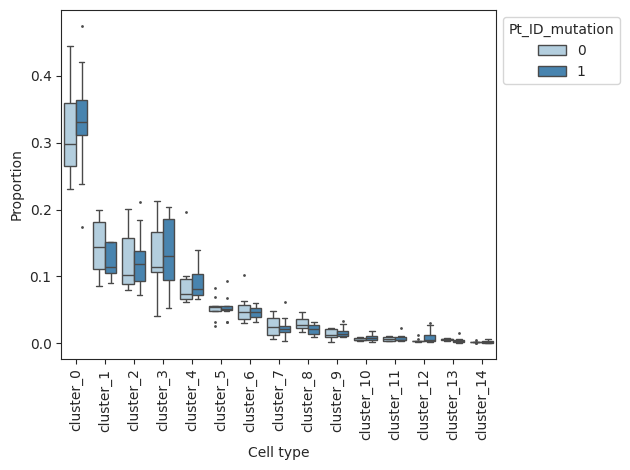

In [15]:
viz.boxplots(data_all, feature_name="Pt_ID_mutation")
plt.show()

In [16]:
# https://github.com/theislab/scCODA_reproducibility/blob/main/applications/microglia_analysis.ipynb
# https://sccoda.readthedocs.io/en/latest/sccoda.util.comp_ana.CompositionalAnalysis.html#sccoda.util.comp_ana.CompositionalAnalysis
# Use this formula to make a wild type -> treated comparison, not the other way
formula = "sex + AGE + apoe_4_dose + C(Pt_ID_mutation, Treatment('0'))"

# Set 0 as "default" category

model_all = mod.CompositionalAnalysis(data_all, formula=formula, reference_cell_type="cluster_0")
all_results = model_all.sample_hmc()
all_results.summary()

100%|██████████| 20000/20000 [04:55<00:00, 67.62it/s]


MCMC sampling finished. (373.733 sec)
Acceptance rate: 50.0%
Compositional Analysis summary:

Data: 20 samples, 15 cell types
Reference index: 0
Formula: sex + AGE + apoe_4_dose + C(Pt_ID_mutation, Treatment('0'))

Intercepts:
            Final Parameter  Expected Sample
Cell Type                                   
cluster_0            -0.492       204.934919
cluster_1             0.601       611.363960
cluster_2            -0.001       334.853278
cluster_3            -0.461       211.387398
cluster_4             0.746       706.760929
cluster_5            -1.534        72.290481
cluster_6             0.596       608.314769
cluster_7            -2.638        23.967349
cluster_8             0.007       337.542849
cluster_9            -1.280        93.194850
cluster_10            1.255      1175.786378
cluster_11           -0.943       130.541667
cluster_12            1.739      1907.774123
cluster_13           -0.758       157.070141
cluster_14           -1.592        68.216909


Effect

In [17]:
all_results.summary_extended(hdi_prob=0.9)

Compositional Analysis summary (extended):

Data: 20 samples, 15 cell types
Reference index: 0
Formula: sex + AGE + apoe_4_dose + C(Pt_ID_mutation, Treatment('0'))
Spike-and-slab threshold: 1.000

MCMC Sampling: Sampled 20000 chain states (5000 burnin samples) in 373.733 sec. Acceptance rate: 50.0%

Intercepts:
            Final Parameter  HDI 5%  HDI 95%   SD  Expected Sample
Cell Type                                                         
cluster_0            -0.492  -0.492   -0.492  0.0       204.934919
cluster_1             0.601   0.601    0.601  0.0       611.363960
cluster_2            -0.001  -0.001   -0.001  0.0       334.853278
cluster_3            -0.461  -0.461   -0.461  0.0       211.387398
cluster_4             0.746   0.746    0.746  0.0       706.760929
cluster_5            -1.534  -1.534   -1.534  0.0        72.290481
cluster_6             0.596   0.596    0.596  0.0       608.314769
cluster_7            -2.638  -2.638   -2.638  0.0        23.967349
cluster_8        

In [18]:
cred_eff = all_results.credible_effects()
cred_eff

Covariate                               Cell Type 
sex[T.male]                             cluster_0     False
                                        cluster_1      True
                                        cluster_2      True
                                        cluster_3      True
                                        cluster_4      True
                                        cluster_5      True
                                        cluster_6      True
                                        cluster_7      True
                                        cluster_8      True
                                        cluster_9      True
                                        cluster_10     True
                                        cluster_11     True
                                        cluster_12     True
                                        cluster_13     True
                                        cluster_14     True
C(Pt_ID_mutation, Treatment('0'))[T.1]  cluster_0

In [19]:
cred_eff.loc['C(Pt_ID_mutation, Treatment(\'0\'))[T.1]']

Cell Type
cluster_0     False
cluster_1      True
cluster_2      True
cluster_3      True
cluster_4      True
cluster_5      True
cluster_6      True
cluster_7      True
cluster_8      True
cluster_9      True
cluster_10     True
cluster_11     True
cluster_12     True
cluster_13     True
cluster_14     True
Name: Final Parameter, dtype: bool

What if we tried this on every cell type (as reference)?

In [20]:
# Run scCODA with each cell type as the reference
cell_types = data_all.var.index
results_cycle = pd.DataFrame(index=cell_types, columns=["times_credible"]).fillna(0)

for ct in cell_types:
    print(f"Reference: {ct}")

    # Run inference
    model_temp = mod.CompositionalAnalysis(data_all, formula=formula, reference_cell_type=ct)
    temp_results = model_temp.sample_hmc(num_results=20000)

    # Select credible effects
    cred_eff = temp_results.credible_effects()
    tmp = cred_eff.loc['C(Pt_ID_mutation, Treatment(\'0\'))[T.1]']

    # add up credible effects
    results_cycle["times_credible"] += tmp.astype("int")
    print(results_cycle)

Reference: cluster_0


100%|██████████| 20000/20000 [04:56<00:00, 67.35it/s]


MCMC sampling finished. (375.496 sec)
Acceptance rate: 45.3%
            times_credible
cluster_0                0
cluster_1                1
cluster_2                1
cluster_3                1
cluster_4                1
cluster_5                1
cluster_6                1
cluster_7                1
cluster_8                1
cluster_9                1
cluster_10               1
cluster_11               1
cluster_12               1
cluster_13               1
cluster_14               1
Reference: cluster_1


100%|██████████| 20000/20000 [04:57<00:00, 67.29it/s]


MCMC sampling finished. (375.743 sec)
Acceptance rate: 46.2%
            times_credible
cluster_0                1
cluster_1                1
cluster_2                2
cluster_3                2
cluster_4                2
cluster_5                2
cluster_6                2
cluster_7                2
cluster_8                2
cluster_9                2
cluster_10               2
cluster_11               2
cluster_12               2
cluster_13               2
cluster_14               2
Reference: cluster_2


100%|██████████| 20000/20000 [04:52<00:00, 68.43it/s]


MCMC sampling finished. (369.155 sec)
Acceptance rate: 62.0%
            times_credible
cluster_0                2
cluster_1                1
cluster_2                2
cluster_3                2
cluster_4                2
cluster_5                2
cluster_6                2
cluster_7                2
cluster_8                2
cluster_9                2
cluster_10               2
cluster_11               2
cluster_12               2
cluster_13               2
cluster_14               2
Reference: cluster_3


100%|██████████| 20000/20000 [05:00<00:00, 66.57it/s]


MCMC sampling finished. (379.348 sec)
Acceptance rate: 44.9%
            times_credible
cluster_0                3
cluster_1                2
cluster_2                3
cluster_3                2
cluster_4                3
cluster_5                3
cluster_6                3
cluster_7                3
cluster_8                3
cluster_9                3
cluster_10               3
cluster_11               3
cluster_12               3
cluster_13               3
cluster_14               3
Reference: cluster_4


100%|██████████| 20000/20000 [05:00<00:00, 66.58it/s]


MCMC sampling finished. (379.282 sec)
Acceptance rate: 39.9%
            times_credible
cluster_0                4
cluster_1                3
cluster_2                4
cluster_3                3
cluster_4                3
cluster_5                4
cluster_6                4
cluster_7                4
cluster_8                4
cluster_9                4
cluster_10               4
cluster_11               4
cluster_12               4
cluster_13               4
cluster_14               4
Reference: cluster_5


100%|██████████| 20000/20000 [05:00<00:00, 66.65it/s]


MCMC sampling finished. (378.166 sec)
Acceptance rate: 35.7%
            times_credible
cluster_0                5
cluster_1                4
cluster_2                5
cluster_3                4
cluster_4                4
cluster_5                4
cluster_6                5
cluster_7                5
cluster_8                5
cluster_9                5
cluster_10               5
cluster_11               5
cluster_12               5
cluster_13               5
cluster_14               5
Reference: cluster_6


100%|██████████| 20000/20000 [05:00<00:00, 66.60it/s]


MCMC sampling finished. (377.429 sec)
Acceptance rate: 35.8%
            times_credible
cluster_0                6
cluster_1                5
cluster_2                6
cluster_3                5
cluster_4                5
cluster_5                5
cluster_6                5
cluster_7                6
cluster_8                6
cluster_9                6
cluster_10               6
cluster_11               6
cluster_12               6
cluster_13               6
cluster_14               6
Reference: cluster_7


100%|██████████| 20000/20000 [05:00<00:00, 66.53it/s]


MCMC sampling finished. (379.924 sec)
Acceptance rate: 44.1%
            times_credible
cluster_0                7
cluster_1                6
cluster_2                7
cluster_3                6
cluster_4                6
cluster_5                6
cluster_6                6
cluster_7                6
cluster_8                7
cluster_9                7
cluster_10               7
cluster_11               7
cluster_12               7
cluster_13               7
cluster_14               7
Reference: cluster_8


100%|██████████| 20000/20000 [04:51<00:00, 68.62it/s]


MCMC sampling finished. (367.222 sec)
Acceptance rate: 0.8%
            times_credible
cluster_0                8
cluster_1                7
cluster_2                7
cluster_3                6
cluster_4                6
cluster_5                7
cluster_6                6
cluster_7                6
cluster_8                7
cluster_9                8
cluster_10               7
cluster_11               8
cluster_12               8
cluster_13               7
cluster_14               8
Reference: cluster_9


100%|██████████| 20000/20000 [04:52<00:00, 68.35it/s]


MCMC sampling finished. (368.608 sec)
Acceptance rate: 15.3%
            times_credible
cluster_0                8
cluster_1                7
cluster_2                7
cluster_3                6
cluster_4                7
cluster_5                8
cluster_6                7
cluster_7                7
cluster_8                7
cluster_9                8
cluster_10               7
cluster_11               9
cluster_12               8
cluster_13               8
cluster_14               8
Reference: cluster_10


100%|██████████| 20000/20000 [04:59<00:00, 66.68it/s]


MCMC sampling finished. (378.557 sec)
Acceptance rate: 46.0%
            times_credible
cluster_0                9
cluster_1                8
cluster_2                8
cluster_3                7
cluster_4                8
cluster_5                9
cluster_6                8
cluster_7                8
cluster_8                8
cluster_9                9
cluster_10               7
cluster_11              10
cluster_12               9
cluster_13               9
cluster_14               9
Reference: cluster_11


100%|██████████| 20000/20000 [04:57<00:00, 67.15it/s]


MCMC sampling finished. (374.119 sec)
Acceptance rate: 46.3%
            times_credible
cluster_0                9
cluster_1                8
cluster_2                8
cluster_3                7
cluster_4                8
cluster_5                9
cluster_6                8
cluster_7                8
cluster_8                8
cluster_9                9
cluster_10               7
cluster_11              10
cluster_12               9
cluster_13               9
cluster_14               9
Reference: cluster_12


100%|██████████| 20000/20000 [04:50<00:00, 68.78it/s]


MCMC sampling finished. (365.516 sec)
Acceptance rate: 1.1%
            times_credible
cluster_0               10
cluster_1                8
cluster_2                8
cluster_3                7
cluster_4                9
cluster_5               10
cluster_6                8
cluster_7                8
cluster_8                9
cluster_9                9
cluster_10               8
cluster_11              11
cluster_12               9
cluster_13               9
cluster_14               9
Reference: cluster_13


100%|██████████| 20000/20000 [05:06<00:00, 65.17it/s]


MCMC sampling finished. (387.379 sec)
Acceptance rate: 44.3%
            times_credible
cluster_0               11
cluster_1                9
cluster_2                9
cluster_3                8
cluster_4               10
cluster_5               11
cluster_6                9
cluster_7                9
cluster_8               10
cluster_9               10
cluster_10               9
cluster_11              12
cluster_12              10
cluster_13               9
cluster_14              10
Reference: cluster_14


100%|██████████| 20000/20000 [04:58<00:00, 67.11it/s]


MCMC sampling finished. (375.127 sec)
Acceptance rate: 18.7%
            times_credible
cluster_0               11
cluster_1                9
cluster_2                9
cluster_3                8
cluster_4               10
cluster_5               11
cluster_6                9
cluster_7                9
cluster_8               10
cluster_9               10
cluster_10               9
cluster_11              12
cluster_12              10
cluster_13               9
cluster_14              10


In [21]:
results_cycle

,times_credible
cluster_0,11
cluster_1,9
cluster_2,9
cluster_3,8
cluster_4,10
cluster_5,11
cluster_6,9
cluster_7,9
cluster_8,10
cluster_9,10
